In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 0. General note

* This notebook produces figures and calculations presented in [Ye et al. 2017, JGR](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2016JB013811).

* This notebook demonstrates how to correct pressure scales for the existing phase boundary data.

# 1. Global setup

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from uncertainties import unumpy as unp
import pytheos as eos

# 2. Pressure calculations for PPv

* Data from Tateno2009

T (K) | Au-Tsuchiya | Pt-Holmes | MgO-Speziale
------|-------------|-----------|--------------
3500  | 120.4       | 137.7     | 135.6
2000  | 110.5       | 126.8     | 115.8

* Dorogokupets2007

T (K) | Au          | Pt        | MgO   
------|-------------|-----------|--------------
3500  | 119.7       | 135.2     | 129.6
2000  | 108.9       | 123.2     | 113.2

<b>
* In conclusion, PPV boundary discrepancy is not likely due to pressure scale problem.
</b>

In [3]:
t_ppv = np.asarray([3500., 2000.])

In [4]:
Au_T = eos.gold.Tsuchiya2003()
Au_D = eos.gold.Dorogokupets2007()

v = np.asarray([51.58,51.7])
p_Au_T_ppv = Au_T.cal_p(v, t_ppv)
p_Au_D_ppv = Au_D.cal_p(v, t_ppv)
print(p_Au_T_ppv, p_Au_D_ppv)
print('slopes: ', (p_Au_T_ppv[0]-p_Au_T_ppv[1])/(t_ppv[0]-t_ppv[1]),\
      (p_Au_D_ppv[0]-p_Au_D_ppv[1])/(t_ppv[0]-t_ppv[1]) )

[120.4394917114189+/-0.009819156315686408
 110.4900924018267+/-0.009709312775041275] [119.7228389957068+/-0.009397458639736574
 108.86638382366034+/-0.009303587653953853]
slopes:  0.00663293+/-0.00000019 0.00723764+/-0.00000010


In [5]:
Pt_H = eos.platinum.Holmes1989()
Pt_D = eos.platinum.Dorogokupets2007()

v = np.asarray([48.06, 48.09])
p_Pt_H_ppv = Pt_H.cal_p(v, t_ppv)
p_Pt_D_ppv = Pt_D.cal_p(v, t_ppv)
print(p_Pt_H_ppv, p_Pt_D_ppv)
print('slopes: ', (p_Pt_H_ppv[0]-p_Pt_H_ppv[1])/(t_ppv[0]-t_ppv[1]),\
      (p_Pt_D_ppv[0]-p_Pt_D_ppv[1])/(t_ppv[0]-t_ppv[1]) )

[137.6555991946231+/-0.013599646548263514
 126.72997767244723+/-0.013563105650520829] [135.2453540348088+/-0.01256394315079498
 123.20614456480777+/-0.012523012644444907]
slopes:  0.007283748+/-0.000000024 0.00802614+/-0.00000024


In [6]:
MgO_S = eos.periclase.Speziale2001()
MgO_D = eos.periclase.Dorogokupets2007()

v = np.asarray([52.87, 53.6])
p_MgO_S_ppv = MgO_S.cal_p(v, t_ppv)
p_MgO_D_ppv = MgO_D.cal_p(v, t_ppv)
print(p_MgO_S_ppv, p_MgO_D_ppv)
print('slopes: ', (p_MgO_S_ppv[0]-p_MgO_S_ppv[1])/(t_ppv[0]-t_ppv[1]), \
      (p_MgO_D_ppv[0]-p_MgO_D_ppv[1])/(t_ppv[0]-t_ppv[1]) )

[135.56997269894586+/-0.9530902142955003
 115.8281642808288+/-0.49022460541552476] [129.57114762303976+/-0.0071388388100554765
 113.23868528253495+/-0.006849434801332905]
slopes:  0.01316+/-0.00032 0.01088831+/-0.00000020


# 3. Post-spinel

Fei2004

Scales|  PT        |  PT 
------|------------|------------
MgO-S | 23.6, 1573 | 22.8, 2173
MgO-D | 23.1, 1573 | 22.0, 2173

Ye2014

Scales | PT         | PT
-------|------------|------------
Pt-F   | 25.2, 1550 | 23.2, 2380
Pt-D   | 24.6, 1550 | 22.5, 2380 
Au-F   | 28.3, 1650 | 27.1, 2150
Au-D   | 27.0, 1650 | 25.6, 2150

In [7]:
MgO_S = eos.periclase.Speziale2001()
MgO_D = eos.periclase.Dorogokupets2007()

v = np.asarray([68.75, 70.3])
t_MgO = np.asarray([1573.,2173.])
p_MgO_S = MgO_S.cal_p(v, t_MgO)
p_MgO_D = MgO_D.cal_p(v, t_MgO)
print(p_MgO_S, p_MgO_D)
print('slopes: ', (p_MgO_S[0]-p_MgO_S[1])/(t_MgO[0]-t_MgO[1]), (p_MgO_D[0]-p_MgO_D[1])/(t_MgO[0]-t_MgO[1]) )

[23.64022290732067+/-0.22706825547643575
 22.87853717791088+/-0.3102166053839235] [23.137126505601984+/-0.0029845506738880247
 21.993704969833033+/-0.0027476972864245606]
slopes:  -0.00127+/-0.00015 -0.0019057+/-0.0000004


In [8]:
Pt_F = eos.platinum.Fei2007bm3()
Pt_D = eos.platinum.Dorogokupets2007()

v = np.asarray([57.43, 58.85])
t_Pt = np.asarray([1550., 2380.])
p_Pt_F = Pt_F.cal_p(v, t_Pt)
p_Pt_D = Pt_D.cal_p(v, t_Pt)
print(p_Pt_F, p_Pt_D)
print('slopes: ', (p_Pt_F[0]-p_Pt_F[1])/(t_Pt[0]-t_Pt[1]), (p_Pt_D[0]-p_Pt_D[1])/(t_Pt[0]-t_Pt[1]) )

[25.200649645974792+/-0.25969718379544227
 23.230785354652753+/-0.2648410029437544] [24.59913157550942+/-0.005887323086638988
 22.499791438857738+/-0.0052772503634970006]
slopes:  -0.00237+/-0.00009 -0.0025293+/-0.0000009


In [9]:
Au_F = eos.gold.Fei2007bm3()
Au_D = eos.gold.Dorogokupets2007()

v = np.asarray([62.33,63.53])
t_Au = np.asarray([1650., 2150.])
p_Au_F = Au_F.cal_p(v, t_Au)
p_Au_D = Au_D.cal_p(v, t_Au)
print(p_Au_F, p_Au_D)
print('slopes: ', (p_Au_F[0]-p_Au_F[1])/(t_Au[0]-t_Au[1]), (p_Au_D[0]-p_Au_D[1])/(t_Au[0]-t_Au[1]) )

[28.16271932337142+/-0.2760383097641682
 26.998871383434775+/-0.30416857634961575] [26.971967227663487+/-0.003928755274354221
 25.587752685336014+/-0.003565439028788304]
slopes:  -0.00233+/-0.00008 -0.0027684+/-0.0000008


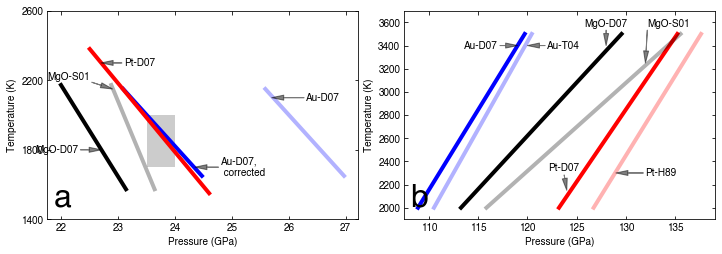

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3.5))
#ax.plot(unp.nominal_values(p_Au_T), t, c='b', ls='--', label='Au-Tsuchiya')
lw = 4
l_alpha = 0.3

ax1.plot(unp.nominal_values(p_Au_D), t_Au, c='b', ls='-', alpha=l_alpha, label='Au-D07', lw=lw)
ax1.annotate('Au-D07', xy=(25.7, 2100), xycoords='data',
            xytext=(26.9, 2100), textcoords='data',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=1, width = 0.1, headwidth=5),
            horizontalalignment='right', verticalalignment='center')

ax1.plot(unp.nominal_values(p_Au_D-2.5), t_Au, c='b', ls='-', label='Au-mD07', lw=lw)
ax1.annotate('Au-D07,\n corrected', xy=(24.35, 1700), xycoords='data',
            xytext=(24.8, 1700), textcoords='data',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=1, width = 0.1, headwidth=5),
            horizontalalignment='left', verticalalignment='center')

#ax.plot(unp.nominal_values(p_Pt_H), t, c='r', ls='--', label='Pt-Holmes')
ax1.plot(unp.nominal_values(p_Pt_D), t_Pt, c='r', ls='-', label='Pt-D07', lw=lw)
ax1.annotate('Pt-D07', xy=(22.7, 2300), xycoords='data',
            xytext=(23.1, 2300), textcoords='data',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=1, width = 0.1, headwidth=5),
            horizontalalignment='left', verticalalignment='center')

ax1.plot(unp.nominal_values(p_MgO_S), t_MgO, c='k', ls='-', alpha=l_alpha, label='MgO-S01', lw=lw)
ax1.annotate('MgO-S01', xy=(22.9, 2150), xycoords='data',
            xytext=(22.5, 2250), textcoords='data',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=1, width = 0.1, headwidth=5),
            horizontalalignment='right', verticalalignment='top')

ax1.plot(unp.nominal_values(p_MgO_D), t_MgO, c='k', ls='-', label='MgO-D07', lw=lw)
ax1.annotate('MgO-D07', xy=(22.7, 1800), xycoords='data',
            xytext=(22.3, 1800), textcoords='data',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=1, width = 0.1, headwidth=5),
            horizontalalignment='right', verticalalignment='center')

ax1.fill([23.5,24,24,23.5], [1700,1700,2000,2000], 'k', alpha=0.2)

ax1.set_xlabel("Pressure (GPa)"); ax1.set_ylabel("Temperature (K)")
#l = ax1.legend(loc=3, fontsize=10, handlelength=2.5); l.get_frame().set_linewidth(0.5)

ax2.plot(unp.nominal_values(p_Au_T_ppv), t_ppv, c='b', ls='-', alpha=l_alpha, label='Au-T04', lw=lw)
ax2.annotate('Au-T04', xy=(120, 3400), xycoords='data',
            xytext=(122, 3400), textcoords='data',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=1, width = 0.1, headwidth=5),
            horizontalalignment='left', verticalalignment='center')

ax2.plot(unp.nominal_values(p_Au_D_ppv), t_ppv, c='b', ls='-', label='Au-D07', lw=lw)
ax2.annotate('Au-D07', xy=(119, 3400), xycoords='data',
            xytext=(117, 3400), textcoords='data',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=1, width = 0.1, headwidth=5),
            horizontalalignment='right', verticalalignment='center')

ax2.plot(unp.nominal_values(p_Pt_H_ppv), t_ppv, c='r', ls='-', alpha=l_alpha, label='Pt-H89', lw=lw)
ax2.annotate('Pt-H89', xy=(129, 2300), xycoords='data',
            xytext=(132, 2300), textcoords='data',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=1, width = 0.1, headwidth=5),
            horizontalalignment='left', verticalalignment='center')

ax2.plot(unp.nominal_values(p_Pt_D_ppv), t_ppv, c='r', ls='-', label='Pt-D07', lw=lw)
ax2.annotate('Pt-D07', xy=(124, 2150), xycoords='data',
            xytext=(123.7, 2300), textcoords='data',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=1, width = 0.1, headwidth=5),
            horizontalalignment='center', verticalalignment='bottom')

ax2.plot(unp.nominal_values(p_MgO_S_ppv), t_ppv, c='k', ls='-', alpha=l_alpha, label='MgO-S01', lw=lw)
ax2.annotate('MgO-S01', xy=(132, 3250), xycoords='data',
            xytext=(132.2, 3550), textcoords='data',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=1, width = 0.1, headwidth=5),
            horizontalalignment='left', verticalalignment='bottom')

ax2.plot(unp.nominal_values(p_MgO_D_ppv), t_ppv, c='k', ls='-', label='MgO-D07', lw=lw)
ax2.annotate('MgO-D07', xy=(128, 3400), xycoords='data',
            xytext=(128, 3550), textcoords='data',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=1, width = 0.1, headwidth=5),
            horizontalalignment='center', verticalalignment='bottom')

ax2.set_xlabel("Pressure (GPa)"); ax2.set_ylabel("Temperature (K)")
ax2.set_ylim(1900, 3700.)
#l = ax2.legend(loc=0, fontsize=10, handlelength=2.5); l.get_frame().set_linewidth(0.5)

ax1.text(0.05, 0.03, 'a', horizontalalignment='center',\
            verticalalignment='bottom', transform = ax1.transAxes,\
              fontsize = 32)
ax2.text(0.05, 0.03, 'b', horizontalalignment='center',\
            verticalalignment='bottom', transform = ax2.transAxes,\
              fontsize = 32)

ax1.set_yticks(ax1.get_yticks()[::2])
#ax2.set_yticks(ax2.get_yticks()[::2])
plt.tight_layout(pad=0.6)

plt.savefig('f-boundaries.pdf', bbox_inches='tight', \
                        pad_inches=0.1)